<a href="https://colab.research.google.com/github/u1117383/python_project/blob/main/Lauren_Lengel_IS4485_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Factors that Lead to the Most Successful Novels**

By Lauren Lengel




---




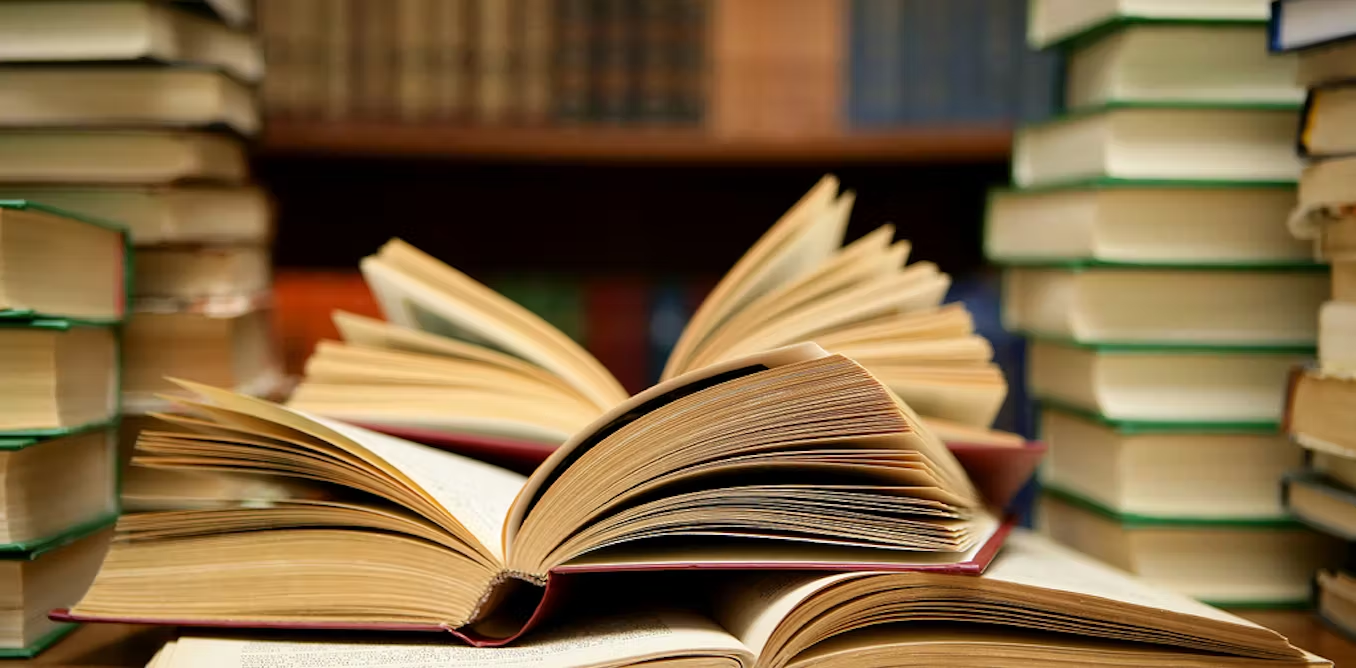



---



## **Main Question & Background**

*Research Question: What are the trends of most successful novels?*


---


I choose to research the trends of the best novels because I have a goal to work in the publishing industry someday. Using the Python skills I've developed through this course to conduct data analysis, I believe I will have a better understanding of what makes novels more successful and the publishing industry itself.



---





## **Data Sources**

Two Data Sources:



>


[*Amazon's Top 50 Bestselling Book 2009 - 2019*](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019)




>



[*Goodreads Book Datasets With User Rating 2M*](https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m?select=book1100k-1200k.csv)



>




---

These data sources include both a way to measure success through ratings and ways to identify areas that could correlate to that success, such as genre. They are also rated highly on Kaggle for their usability. The Goodreads data is updated very often and contacts available to reach out to with questions if necessary.

In comparison, other book data sources do not have measures of "success" to use (such as ratings or profits). Publishing companies only release their profits on books through NPR, which is exclusive to people who have that access. Therefore, data with individual novel revenues is not available. So in this analysis, success is defined through highest rated and highest ratings Besides this, many datasets do not include factors that could contribute to a novel's success such as genres. If they are included, they're often listed in a complicated way.

Overall, this presentation will conduct an analysis of genres and other factors that may contribute to book success over time. Book success will be measured through ratings.






---




**Essientially:**


> Issues with finding data included:

*   No accurate sales figures were accessible
*   Genres often excluded



> Solution:


* Chose data that had the highest rated books with the most reviews and main genres highlighted.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import seaborn as sns
%matplotlib inline

## **Parsing the Data**

In [ ]:
# Parsing the data
df_amazon_data = pd.read_csv("bestsellers with categories.csv")
df_goodreads_data = pd.read_csv("book_dataset.csv")

In [ ]:
df_amazon_data.head(551)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
df_goodreads_data.head(50)

,Title,Author,User Rating,Reviews,Publishing Date,Main Genre,Primary Audience,Classics,Dystopia
0,Harry Potter and the Sorcerer's Stone,"J.K. Rowling, Mary GrandPré (Illustrator)",4.47,7348,2003,Fantasy,Middle Grade,Yes,No
1,The Hunger Games,Suzanne Collins,4.33,30516,2005,Science Fiction,Young Adult,No,Yes
2,Twilight,Stephenie Meyer,3.60,14874,2006,Fantasy,Young Adult,No,No
3,To Kill a Mockingbird,Harper Lee,4.28,23328,2006,Historical,Young Adult,Yes,No
4,The Great Gatsby,"F. Scott Fitzgerald, Francis Scott Fitzgerald",3.92,8142,2004,Historical,Adult,Yes,No
5,The Fault in Our Stars,John Green (Goodreads Author),4.21,11287,2012,Romance,Young Adult,No,No
6,1984,George Orwell,4.19,3544,2013,Science Fiction,Adult,Yes,Yes
7,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,20452,2000,Romance,Adult,Yes,No
8,Divergent,Veronica Roth (Goodreads Author),4.19,8339,2013,Fantasy,Young Adult,No,Yes
9,"The Hobbit, or There and Back Again",J.R.R. Tolkien,4.27,1284,2002,Fantasy,Young Adult,Yes,No


## **Cleaning the Data**

### Difficulties in Taming Data & Overcoming the Hurdles

---


Apart from having issues with finding useful and usable data, the other main issue I had with processing the data was condensing the Amazon data down since there was so much data over the years.

I overcame the hurdle by condensing the Amazon related data down to the books with the only the highest of ratings. I made it so there were only books with ratings 4.8 and above out of 5).



```
# Code for limiting the Amazon data to the ratings and columns needed

amazon_clean = df_amazon_data[["Name", "User Rating", "Genre", "Year"]]
df_amazon_data = amazon_clean[amazon_clean["User Rating"] > 4.8]

```



This limited the number of books down to 52, which is much more comparable to the books in the Goodreads dataset of 50.

The other issue I had with the Goodreads dataset was that there were many "Unnamed" columns and null values. I overcame this by dropping the unnecessary columns and removing the null values.




```
# Code for cleaning the unnamed columns

df_goodreads_data.drop(df_goodreads_data.columns[df_goodreads_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_goodreads_data.head(50)
```



```
# Code for cleaning the nulls

drop_nulls_gr = df_goodreads_data.dropna(axis=1)
print(drop_nulls_gr)
```

*The above code is shown below with the rest of the steps I took to find these issues and solve them.*


---



In [ ]:
# Cleaning the data
df_goodreads_data.columns.str.match("Unnamed")

array([False, False, False, False, False, False, False, False, False])

In [ ]:
# Dropping extraneous columns
df_goodreads_data.drop(df_goodreads_data.columns[df_goodreads_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_goodreads_data.head(50)

,Title,Author,User Rating,Reviews,Publishing Date,Main Genre,Primary Audience,Classics,Dystopia
0,Harry Potter and the Sorcerer's Stone,"J.K. Rowling, Mary GrandPré (Illustrator)",4.47,7348,2003,Fantasy,Middle Grade,Yes,No
1,The Hunger Games,Suzanne Collins,4.33,30516,2005,Science Fiction,Young Adult,No,Yes
2,Twilight,Stephenie Meyer,3.60,14874,2006,Fantasy,Young Adult,No,No
3,To Kill a Mockingbird,Harper Lee,4.28,23328,2006,Historical,Young Adult,Yes,No
4,The Great Gatsby,"F. Scott Fitzgerald, Francis Scott Fitzgerald",3.92,8142,2004,Historical,Adult,Yes,No
5,The Fault in Our Stars,John Green (Goodreads Author),4.21,11287,2012,Romance,Young Adult,No,No
6,1984,George Orwell,4.19,3544,2013,Science Fiction,Adult,Yes,Yes
7,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,20452,2000,Romance,Adult,Yes,No
8,Divergent,Veronica Roth (Goodreads Author),4.19,8339,2013,Fantasy,Young Adult,No,Yes
9,"The Hobbit, or There and Back Again",J.R.R. Tolkien,4.27,1284,2002,Fantasy,Young Adult,Yes,No


In [ ]:
# Checking for nulls for Goodreads
df_goodreads_data.isnull().sum()

Title               0
Author              0
User Rating         0
Reviews             0
Publishing Date     0
Main Genre          0
Primary Audience    0
Classics            0
Dystopia            0
dtype: int64

In [ ]:
drop_nulls_gr = df_goodreads_data.dropna(axis=1)
print(drop_nulls_gr)

                                        Title  \
0       Harry Potter and the Sorcerer's Stone   
1                            The Hunger Games   
2                                    Twilight   
3                       To Kill a Mockingbird   
4                            The Great Gatsby   
5                      The Fault in Our Stars   
6                                        1984   
7                         Pride and Prejudice   
8                                   Divergent   
9         The Hobbit, or There and Back Again   
10       Harry Potter and the Deathly Hallows   
11   Harry Potter and the Prisoner of Azkaban   
12                  The Diary of a Young Girl   
13                                Animal Farm   
14                     The Catcher in the Rye   
15    Harry Potter and the Chamber of Secrets   
16                            Angels & Demons   
17            The Girl with the Dragon Tattoo   
18        Harry Potter and the Goblet of Fire   
19                  

In [ ]:
# Checking for nulls for Amazon
df_amazon_data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
limit = 4.8
column_amazon_ratings = "User Rating"
# Get count of ratings greater than 4.8
count = (df_amazon_data[column_amazon_ratings] > limit).sum()
print('Count of ratings greater than 4.5 in Column User Rating : ', count)

Count of ratings greater than 4.5 in Column User Rating :  52


In [ ]:
# Cleaning for only the highest of the highly-rated Amazon Rated Books. This resulted in a number of books more comparable to the Goodreads data (of 50)
amazon_clean = df_amazon_data[["Name", "User Rating", "Genre", "Year"]]
df_amazon_data = amazon_clean[amazon_clean["User Rating"] > 4.8]

In [ ]:
df_amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 40 to 545
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         52 non-null     object 
 1   User Rating  52 non-null     float64
 2   Genre        52 non-null     object 
 3   Year         52 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [ ]:
# reseting the index set the indices in order
df_goodreads_data.reset_index(inplace = True)

In [ ]:
df_amazon_data.reset_index(inplace = True)

# **Top Rated Books and Genre Analysis**





---

## First Analytical Technique


> Analysis Through Counts of the Data




---













In [ ]:
# Group by Genre (x-axis) and Total User Rating (y-axis) for Goodreads
dfgrp_genre_ratings_a = df_amazon_data.groupby(["Genre"])["User Rating"].count()

In [ ]:
df_amazon_data.groupby(["Genre"])["User Rating"].count()

Genre
Fiction        41
Non Fiction    11
Name: User Rating, dtype: int64

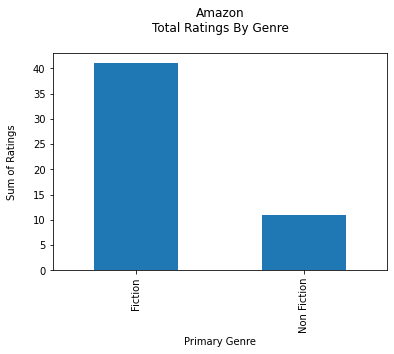

In [ ]:
fig, axs = plt.subplots(1,1)
dfgrp_genre_ratings_a.plot(kind = "bar", ax=axs)
axs.set_title("Amazon\nTotal Ratings By Genre\n")
axs.set_ylabel("Sum of Ratings\n")
axs.set_xlabel("Primary Genre")
plt.show()

In [ ]:
# Group by Genre (x-axis) and Total User Rating (y-axis) for Goodreads
dfgrp_genre_ratings = df_goodreads_data.groupby(["Main Genre"])["User Rating"].count()

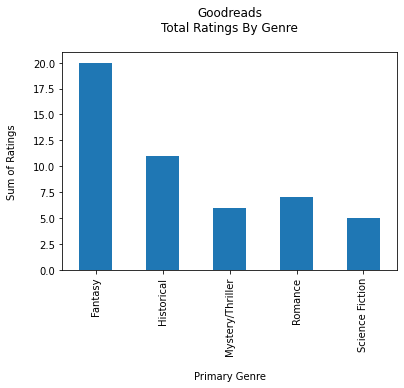

In [ ]:
fig, axs = plt.subplots(1,1)
dfgrp_genre_ratings.plot(kind = "bar", ax=axs)
axs.set_title("Goodreads\nTotal Ratings By Genre\n")
axs.set_ylabel("Sum of Ratings\n")
axs.set_xlabel("\nPrimary Genre")
plt.show()

In [ ]:
# Group by Genre (x-axis) and Genre (y-axis) for Goodreads
dfgrp_genre = df_goodreads_data.groupby(["Main Genre"])["Main Genre"].count()

Majority of Successful Novels are Fantasy


> 41% of the highest rated books



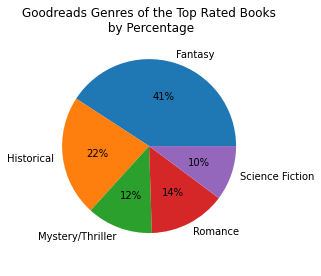

In [ ]:
fig, axs = plt.subplots(1,1)
dfgrp_genre.plot(kind = "pie", autopct = "%.0f%%")
axs.set_title("Goodreads Genres of the Top Rated Books\n by Percentage")
axs.set_ylabel(" ")
axs.set_xlabel(" ")
plt.show()


---

## Second Analytical Technique


> Analysis Through Averages of the Data




---

In [ ]:
# Group by Genre (x-axis) and Average User Rating (y-axis) for Goodreads
dfgrp_avg_ratings = df_goodreads_data.groupby(["Main Genre"])["User Rating"].mean()

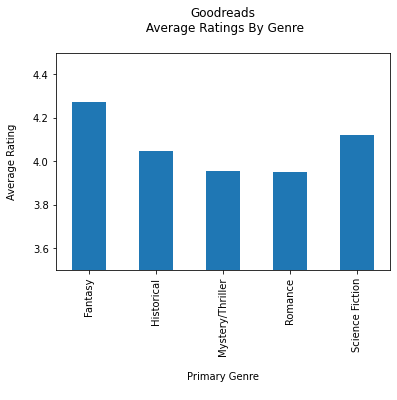

In [ ]:
fig, axs = plt.subplots(1,1)
dfgrp_avg_ratings.plot(kind = "bar", ax=axs)
axs.set_title("Goodreads\n Average Ratings By Genre\n")
axs.set_ylabel("Average Rating\n")
axs.set_xlabel("\nPrimary Genre\n")
axs.set_ylim(ymin=3.5,ymax=4.5)
plt.show()

In [ ]:
# Group by Genre (x-axis) and Average User Rating (y-axis) for Amazon
dfgrp_avg_ratings_a = df_amazon_data.groupby(["Genre"])["User Rating"].mean()

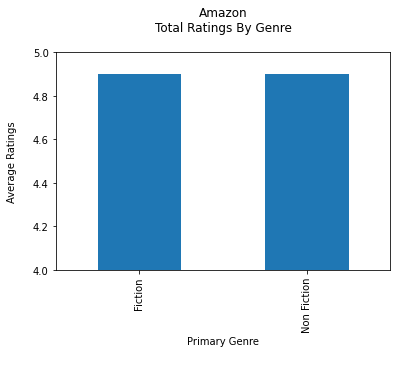

In [ ]:
fig, axs = plt.subplots(1,1)
dfgrp_avg_ratings_a.plot(kind = "bar", ax=axs)
axs.set_title("Amazon\nTotal Ratings By Genre\n")
axs.set_ylabel("Average Ratings\n")
axs.set_xlabel("Primary Genre\n")
axs.set_ylim(ymin=4,ymax=5)
plt.show()

In [ ]:
# Group by Ratings (x-axis) and Time (y-axis) for Goodreads
dfgrp_rating_over_time = df_goodreads_data.groupby(["Publishing Date"])["User Rating"].mean()


In [ ]:
# Group by Genre (x-axis) and Average User Rating (y-axis) for Goodreads
rating_average = df_goodreads_data.groupby(["User Rating"]).mean()

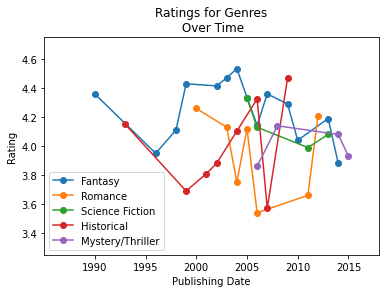

In [ ]:
# Graphing Goodreads ratings for different genres over time

fig, axes = plt.subplots(1,1)
df1 = df_goodreads_data.copy()

df1_databases = df1[df1["Main Genre"] == "Fantasy"]
df2_databases = df1[df1["Main Genre"] == "Romance"]
df3_databases = df1[df1["Main Genre"] == "Science Fiction"]
df4_databases = df1[df1["Main Genre"] == "Historical"]
df5_databases = df1[df1["Main Genre"] == "Mystery/Thriller"]

df1_group = df1_databases.groupby("Publishing Date")["User Rating"]
df2_group = df2_databases.groupby("Publishing Date")["User Rating"]
df3_group = df3_databases.groupby("Publishing Date")["User Rating"]
df4_group = df4_databases.groupby("Publishing Date")["User Rating"]
df5_group = df5_databases.groupby("Publishing Date")["User Rating"]

df1_mean = df1_group.mean()
df2_mean = df2_group.mean()
df3_mean = df3_group.mean()
df4_mean = df4_group.mean()
df5_mean = df5_group.mean()

axes.set_title("Ratings for Genres\n Over Time")
axes.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
axes.set_xlim(xmin=1985, xmax=2018)
axes.set_ylim(ymin=3.25, ymax=4.75)
axes.set_ylabel("Rating")
df1_mean.plot(marker="o", label="Fantasy")
df2_mean.plot(marker="o", label="Romance")
df3_mean.plot(marker="o", label="Science Fiction")
df4_mean.plot(marker="o", label="Historical")
df5_mean.plot(marker="o", label="Mystery/Thriller")
axes.legend()
plt.show()

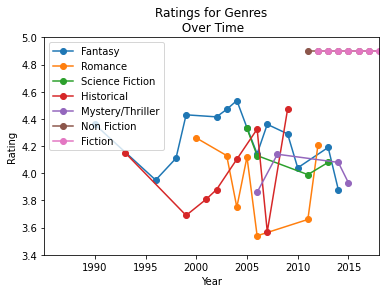

In [ ]:
# Graphing Amazon and Goodreads ratings for different genres over time

fig, axes = plt.subplots(1,1)
df1 = df_goodreads_data.copy()
af1 = df_amazon_data.copy()

df1_databases = df1[df1["Main Genre"] == "Fantasy"]
df2_databases = df1[df1["Main Genre"] == "Romance"]
df3_databases = df1[df1["Main Genre"] == "Science Fiction"]
df4_databases = df1[df1["Main Genre"] == "Historical"]
df5_databases = df1[df1["Main Genre"] == "Mystery/Thriller"]
af6_databases = af1[af1["Genre"] == "Non Fiction"]
af7_databases = af1[af1["Genre"] == "Fiction"]

df1_group = df1_databases.groupby("Publishing Date")["User Rating"]
df2_group = df2_databases.groupby("Publishing Date")["User Rating"]
df3_group = df3_databases.groupby("Publishing Date")["User Rating"]
df4_group = df4_databases.groupby("Publishing Date")["User Rating"]
df5_group = df5_databases.groupby("Publishing Date")["User Rating"]
af6_group = af6_databases.groupby("Year")["User Rating"]
af7_group = af7_databases.groupby("Year")["User Rating"]

df1_mean = df1_group.mean()
df2_mean = df2_group.mean()
df3_mean = df3_group.mean()
df4_mean = df4_group.mean()
df5_mean = df5_group.mean()
af6_mean = af6_group.mean()
af7_mean = af7_group.mean()

axes.set_title("Ratings for Genres\n Over Time")
axes.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
axes.set_xlim(xmin=1985, xmax=2018)
axes.set_ylim(ymin=3.4, ymax=5)
axes.set_ylabel("Rating")
axes.set_xlabel("Year")
df1_mean.plot(marker="o",label="Fantasy")
df2_mean.plot(marker="o", label="Romance")
df3_mean.plot(marker="o", label="Science Fiction")
df4_mean.plot(marker="o", label="Historical")
df5_mean.plot(marker="o", label="Mystery/Thriller")
af6_mean.plot(marker="o", label="Non Fiction")
af7_mean.plot(marker="o", label="Fiction")
axes.legend()
plt.show()



---

## Third Analytical Technique


> Analysis Through Correlation Coefficients of the Data




---

In [ ]:
# Finding the correlation between number of reviews and the user ratings for Goodreads
col1 = df_goodreads_data["Reviews"]
col2 = df_goodreads_data["User Rating"]
col1.corr(col2)

0.13488946645080938

# ***Results & Major Findings***

*Research Question: What are the trends of most successful novels?*


>
>


---

### **Fiction or Non-Fiction?**

The most successful books are generally Fiction rather than Non-Fiction, but both Fiction and Non-Fiction tend to be rated equally well when it comes to average ratings. Fiction has the highest total number of successful books and ratings. This overall shows that Fiction novels tend to occur most often on the highest rated novel lists, but Non-Fiction novels still perform similarily as well even though there are not as many of them.


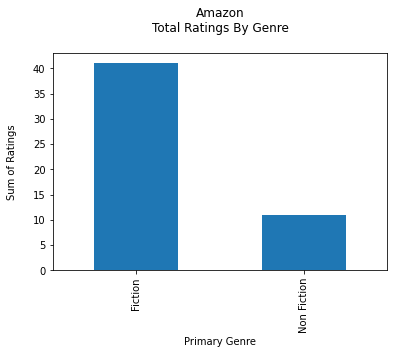


---
### **Which Fiction Novels Genres Are Most Successful?**

Out of Fiction, Fantasy books tends to be the highest rated on average over all the time periods. They also have the highest total of highly rated novels across all the genres.

The below graph demonstrates this, as Fantasy novels are plotted higher on the y-axis scale of high ratings over the x-axis of recent years. Fantasy novels are demonstrated in blue.

However, genres like Historical or Mystery/Thriller have surpassed Fantasy novels in average ratings in the past few years. This shows a potential change in trends. These genres are demonstrated in red and purple respectively in the graph.

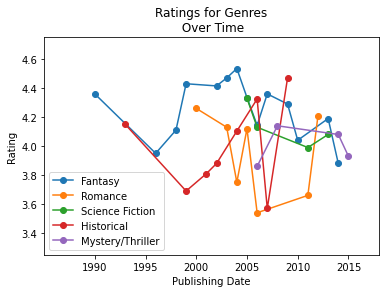


### **The Correlation Between Success and Number of Ratings**

The below correlation is to see if the number of ratings given to the novels is impacting their ratings.

As a correlation coefficient of .10 is usually representative of a weak association, the relationship between number of ratings that a book has receieved and a book's success as measured by ratings do not have a strong relationship. This tells us that books with many reviews do not necessarily lead to highly rated and successful novels. Therefore, the fact that Fantasy novels had the most ratings likely had little influence on their higher ratings overall.

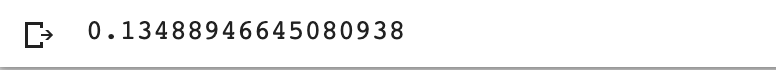


# **Next Steps & Lessons Learned**

If I had more time or resources available I would...


1.   Gather data from NPR




> This is because publishing companies only use NPR to release actual sales numbers in realtime, and the only way to access NPR is through having a licensed account with them. It's exclusive to booksellers and related careerists.

2.   Found datasets with more varied ratings for Amazon

> I would do this so that the Fiction and Non-Fiction books would have been more comparable, as Amazon ratings do not have a second decimal like the Goodreads ratings have (example: 4.8 vs 4.86). I would also have liked to find data when the Goodreads ratings and the Amazon ratings were also more comparable, as the highest Goodreads ratings were in the 4.4 range whereas the highest Amazon ratings were in the 4.9 range. This is likely due to Goodreads having many more ratings than Amazon.

3.   Find more specifics as to why Fantasy is generally popular

> I would love to find a dataset that includes more of the tropes or other aspects of Fantasy that makes the genre popular. It would be really interesting to see how different subgenres and tropes of Fantasy do against each other when it comes to success.

4.   Analyze more genres

> This Goodreads data only included five main fiction genres (Fantasy, Historical, Romance, Mystery/Thriller, and Science Fiction) while the Amazon data only included genres (Fiction and Non-Fiction). It would be interesting to see the data on other genres as well.


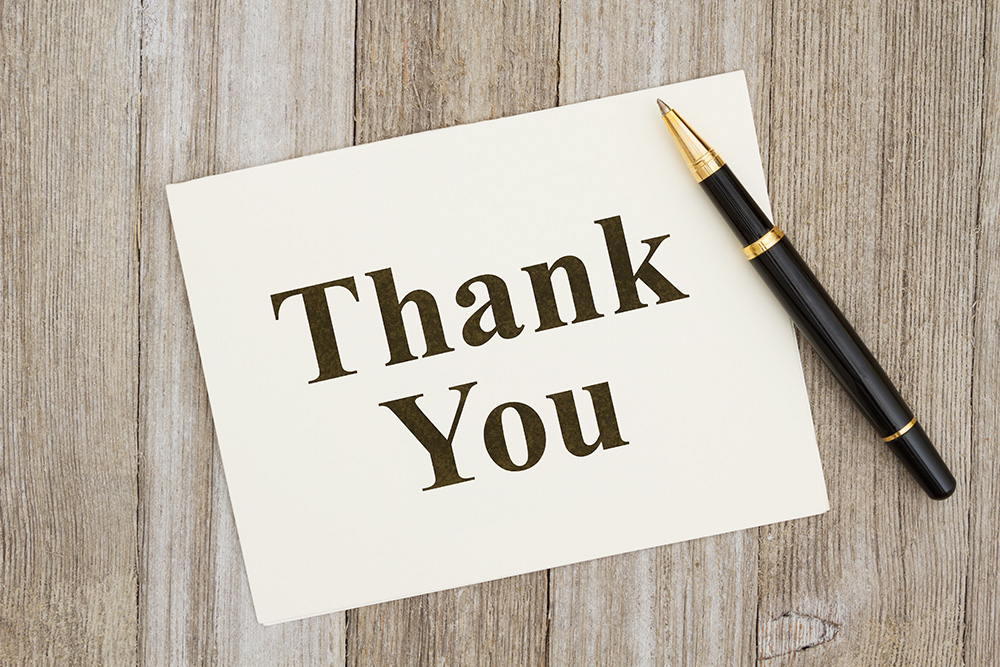